<a href="https://colab.research.google.com/github/le3212/DG-method-code/blob/main/HW0%E7%AC%AC%E4%BA%8C%E5%B0%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install numpy scipy matplotlib
#確保在 Google Colab 中安裝了所需的套件：NumPy、SciPy 和 Matplotlib。執行前可以用以下命令確認

L2 誤差: 2.532526e-04


<ipython-input-11-4f78622143c7>:89: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  L2_error = np.sqrt(np.trapz((f(t_fine) - f_h_vals)**2, t_fine))


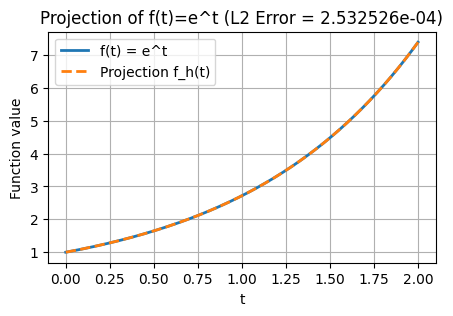

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

# gauleg: 用於生成高斯節點和權重
def gauleg(n):
    """
    Computes the Gauss-Legendre nodes and weights.
    :param n: Number of nodes
    :return: (nodes, weights)
    """
    from numpy.polynomial.legendre import leggauss
    nodes, weights = leggauss(n)
    return nodes, weights

# legtable: 計算勒讓德多項式表格
def legtable(x, k):
    """
    Generate Legendre polynomials up to degree k at points x.
    :param x: Points where to evaluate the polynomials
    :param k: Maximum degree of the polynomials
    :return: Table of Legendre polynomial values
    """
    P = np.zeros((k + 1, len(x)))
    for i in range(k + 1):
        P[i, :] = legendre(i)(x)
    return P

# 主程式
# 1. 設定問題參數
a = 0          # 區間起點
b = 2          # 區間終點
N = 8          # 子區間數
h = (b - a) / N # 每個子區間長度
k = 2          # 投影多項式空間：k 次多項式（共 k+1 個基底）

# 定義原函數 f(t)
f = lambda t: np.exp(t)

# 子區間端點
t_nodes = np.linspace(a, b, N + 1)

# 2. 高斯節點與權重計算
m = k + 2  # 使用 m 點的高斯積分，提升精度
x_gauss, w_gauss = gauleg(m)

# 3. 預先計算每個子區間的投影係數
coeffs = np.zeros((N, k + 1))  # 儲存每個子區間的投影係數

# 對每個子區間進行計算
for n in range(N):
    t_left = t_nodes[n]
    t_right = t_nodes[n + 1]
    # 映射高斯節點到當前子區間
    t_quad = (h / 2) * x_gauss + (t_left + t_right) / 2
    f_quad = f(t_quad)  # f(t) 在高斯節點上的值

    # 計算勒讓德多項式表格
    P = legtable(x_gauss, k)

    # 計算每個基底的投影係數
    for i in range(k + 1):
        I = np.sum(w_gauss * (f_quad * P[i, :]))  # 數值積分
        coeffs[n, i] = (2 * i + 1) / 2 * I

# 4. 建構投影函數 f_h(t)
npts = 1000  # 繪圖用細分網格點數
t_fine = np.linspace(a, b, npts)
f_h_vals = np.zeros_like(t_fine)

# 遍歷所有子區間重建投影函數
for n in range(N):
    t_left = t_nodes[n]
    t_right = t_nodes[n + 1]
    idx = (t_fine >= t_left) & (t_fine <= t_right)
    t_seg = t_fine[idx]
    # 映射到標準區間 [-1, 1]
    s_seg = (2 * t_seg - (t_left + t_right)) / (t_right - t_left)
    # 計算勒讓德多項式值
    P_seg = legtable(s_seg, k)
    # 重建投影函數
    f_seg = np.zeros_like(t_seg)
    for j in range(k + 1):
        f_seg += coeffs[n, j] * P_seg[j, :]
    f_h_vals[idx] = f_seg

# 5. 計算 L2 誤差
# L2_error = sqrt( ∫_a^b (f(t)-f_h(t))^2 dt )
L2_error = np.sqrt(np.trapz((f(t_fine) - f_h_vals)**2, t_fine))
print(f"L2 誤差: {L2_error:.6e}")

# 6. 繪製圖形
plt.figure(figsize=(5, 3))
plt.plot(t_fine, f(t_fine), label="f(t) = e^t", linewidth=2)
plt.plot(t_fine, f_h_vals, label="Projection f_h(t)", linestyle="--", linewidth=2)
plt.xlabel("t")
plt.ylabel("Function value")
plt.title(f"Projection of f(t)=e^t (L2 Error = {L2_error:.6e})")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import legendre

# gauleg: 用於生成高斯節點和權重
def gauleg(n):
    """
    Computes the Gauss-Legendre nodes and weights.
    :param n: Number of nodes
    :return: (nodes, weights)
    """
    from numpy.polynomial.legendre import leggauss
    nodes, weights = leggauss(n)
    return nodes, weights

# legtable: 計算勒讓德多項式表格
def legtable(x, k):
    """
    Generate Legendre polynomials up to degree k at points x.
    :param x: Points where to evaluate the polynomials
    :param k: Maximum degree of the polynomials
    :return: Table of Legendre polynomial values
    """
    P = np.zeros((k + 1, len(x)))
    for i in range(k + 1):
        P[i, :] = legendre(i)(x)
    return P

# 設定問題參數
a = 0          # 區間起點
b = 2          # 區間終點
f = lambda t: np.exp(t)  # 定義原函數 f(t)
t_fine = np.linspace(a, b, 1000)  # 用於計算誤差的細分點

# 設定參數範圍
ks = [2, 4, 6]  # 多項式次數
Ns = [2, 4, 8, 16, 32, 64]  # 分割區間數
errors = np.zeros((len(ks), len(Ns)))  # 儲存誤差
orders = np.zeros((len(ks), len(Ns) - 1))  # 儲存收斂階數

# 高斯節點與權重計算
m = max(ks) + 2  # 使用的高斯節點數量
x_gauss, w_gauss = gauleg(m)

# 主程式
for i, k in enumerate(ks):
    for j, N in enumerate(Ns):
        h = (b - a) / N
        t_nodes = np.linspace(a, b, N + 1)
        coeffs = np.zeros((N, k + 1))  # 儲存投影係數

        # 計算每個區間的投影係數
        for n in range(N):
            t_left = t_nodes[n]
            t_right = t_nodes[n + 1]
            t_quad = (h / 2) * x_gauss + (t_left + t_right) / 2
            f_quad = f(t_quad)
            P = legtable(x_gauss, k)
            for m in range(k + 1):
                I = np.sum(w_gauss * f_quad * P[m, :])
                coeffs[n, m] = (2 * m + 1) / 2 * I

        # 建構投影函數 f_h(t)
        f_h_vals = np.zeros_like(t_fine)
        for n in range(N):
            t_left = t_nodes[n]
            t_right = t_nodes[n + 1]
            idx = (t_fine >= t_left) & (t_fine <= t_right)
            t_seg = t_fine[idx]
            s_seg = (2 * t_seg - (t_left + t_right)) / (t_right - t_left)
            P_seg = legtable(s_seg, k)
            f_seg = np.zeros_like(t_seg)
            for m in range(k + 1):
                f_seg += coeffs[n, m] * P_seg[m, :]
            f_h_vals[idx] = f_seg

        # 計算 L2 誤差
        L2_error = np.sqrt(np.trapz((f(t_fine) - f_h_vals)**2, t_fine))
        errors[i, j] = L2_error

# 計算收斂階數
for i in range(len(ks)):
    for j in range(len(Ns) - 1):
        orders[i, j] = np.log2(errors[i, j] / errors[i, j + 1])

# 顯示誤差表
error_df = pd.DataFrame(errors, columns=Ns, index=[f"Degree {k}" for k in ks])
print("誤差表 (L2 Error):")
print(error_df)

# 顯示收斂階數表
order_df = pd.DataFrame(orders, columns=Ns[:-1], index=[f"Degree {k}" for k in ks])
print("\n收斂階數表 (Order):")
print(order_df)


<ipython-input-8-62fe29174dc9>:79: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  L2_error = np.sqrt(np.trapz((f(t_fine) - f_h_vals)**2, t_fine))


誤差表 (L2 Error):
                    2             4             8             16  \
Degree 2  1.528145e-02  2.002428e-03  2.532526e-04  3.180788e-05   
Degree 4  4.811802e-05  1.581684e-06  5.004970e-08  1.573339e-09   
Degree 6  7.185496e-08  5.913512e-10  4.681307e-12  3.737642e-14   

                    32            64  
Degree 2  3.981018e-06  4.977045e-07  
Degree 4  4.925166e-11  1.539475e-12  
Degree 6  6.345644e-15  6.408871e-15  

收斂階數表 (Order):
                2         4         8         16        32
Degree 2  2.931959  2.983102  2.993121  2.998175  2.999776
Degree 4  4.927044  4.981956  4.991460  4.997514  4.999662
Degree 6  6.924929  6.980960  6.968639  2.558290 -0.014304


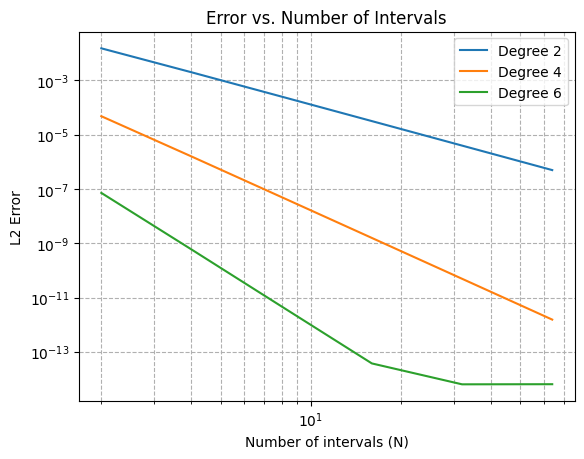

In [ ]:
import matplotlib.pyplot as plt

for i, k in enumerate(ks):
    plt.loglog(Ns, errors[i, :], label=f"Degree {k}")
plt.xlabel("Number of intervals (N)")
plt.ylabel("L2 Error")
plt.legend()
plt.title("Error vs. Number of Intervals")
plt.grid(True, which="both", linestyle="--")
plt.show()
